# Natural Language Processing

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rrcaetano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Logistic Regression Model Performance:
Confusion Matrix:
[[80 17]
 [28 75]]
Accuracy: 0.7750
Precision: 0.8152
Recall: 0.7282
F1 Score: 0.7692


Random Forest Model Performance:
Confusion Matrix:
[[91  6]
 [41 62]]
Accuracy: 0.7650
Precision: 0.9118
Recall: 0.6019
F1 Score: 0.7251


Decision Tree Model Performance:
Confusion Matrix:
[[78 19]
 [31 72]]
Accuracy: 0.7500
Precision: 0.7912
Recall: 0.6990
F1 Score: 0.7423


Support Vector Machine Model Performance:
Confusion Matrix:
[[79 18]
 [24 79]]
Accuracy: 0.7900
Precision: 0.8144
Recall: 0.7670
F1 Score: 0.7900


Naive Bayes Model Performance:
Confusion Matrix:
[[74 23]
 [22 81]]
Accuracy: 0.7750
Precision: 0.7788
Recall: 0.7864
F1 Score: 0.7826


K-Nearest Neighbors Model Performance:
Confusion Matrix:
[[68 29]
 [42 61]]
Accuracy: 0.6450
Precision: 0.6778
Recall: 0.5922
F1 Score: 0.6321


Gradient Boosting Model Performance:
Confusion Matrix:
[[90  7]
 [43 60]]
Accuracy: 0.7500
Precision: 0.8955
Recall: 0.5825
F1 Score: 0.7059




/home/rrcaetano/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Model Performance:
Confusion Matrix:
[[89  8]
 [41 62]]
Accuracy: 0.7550
Precision: 0.8857
Recall: 0.6019
F1 Score: 0.7168


Multilayer Perceptron Model Performance:
Confusion Matrix:
[[79 18]
 [22 81]]
Accuracy: 0.8000
Precision: 0.8182
Recall: 0.7864
F1 Score: 0.8020




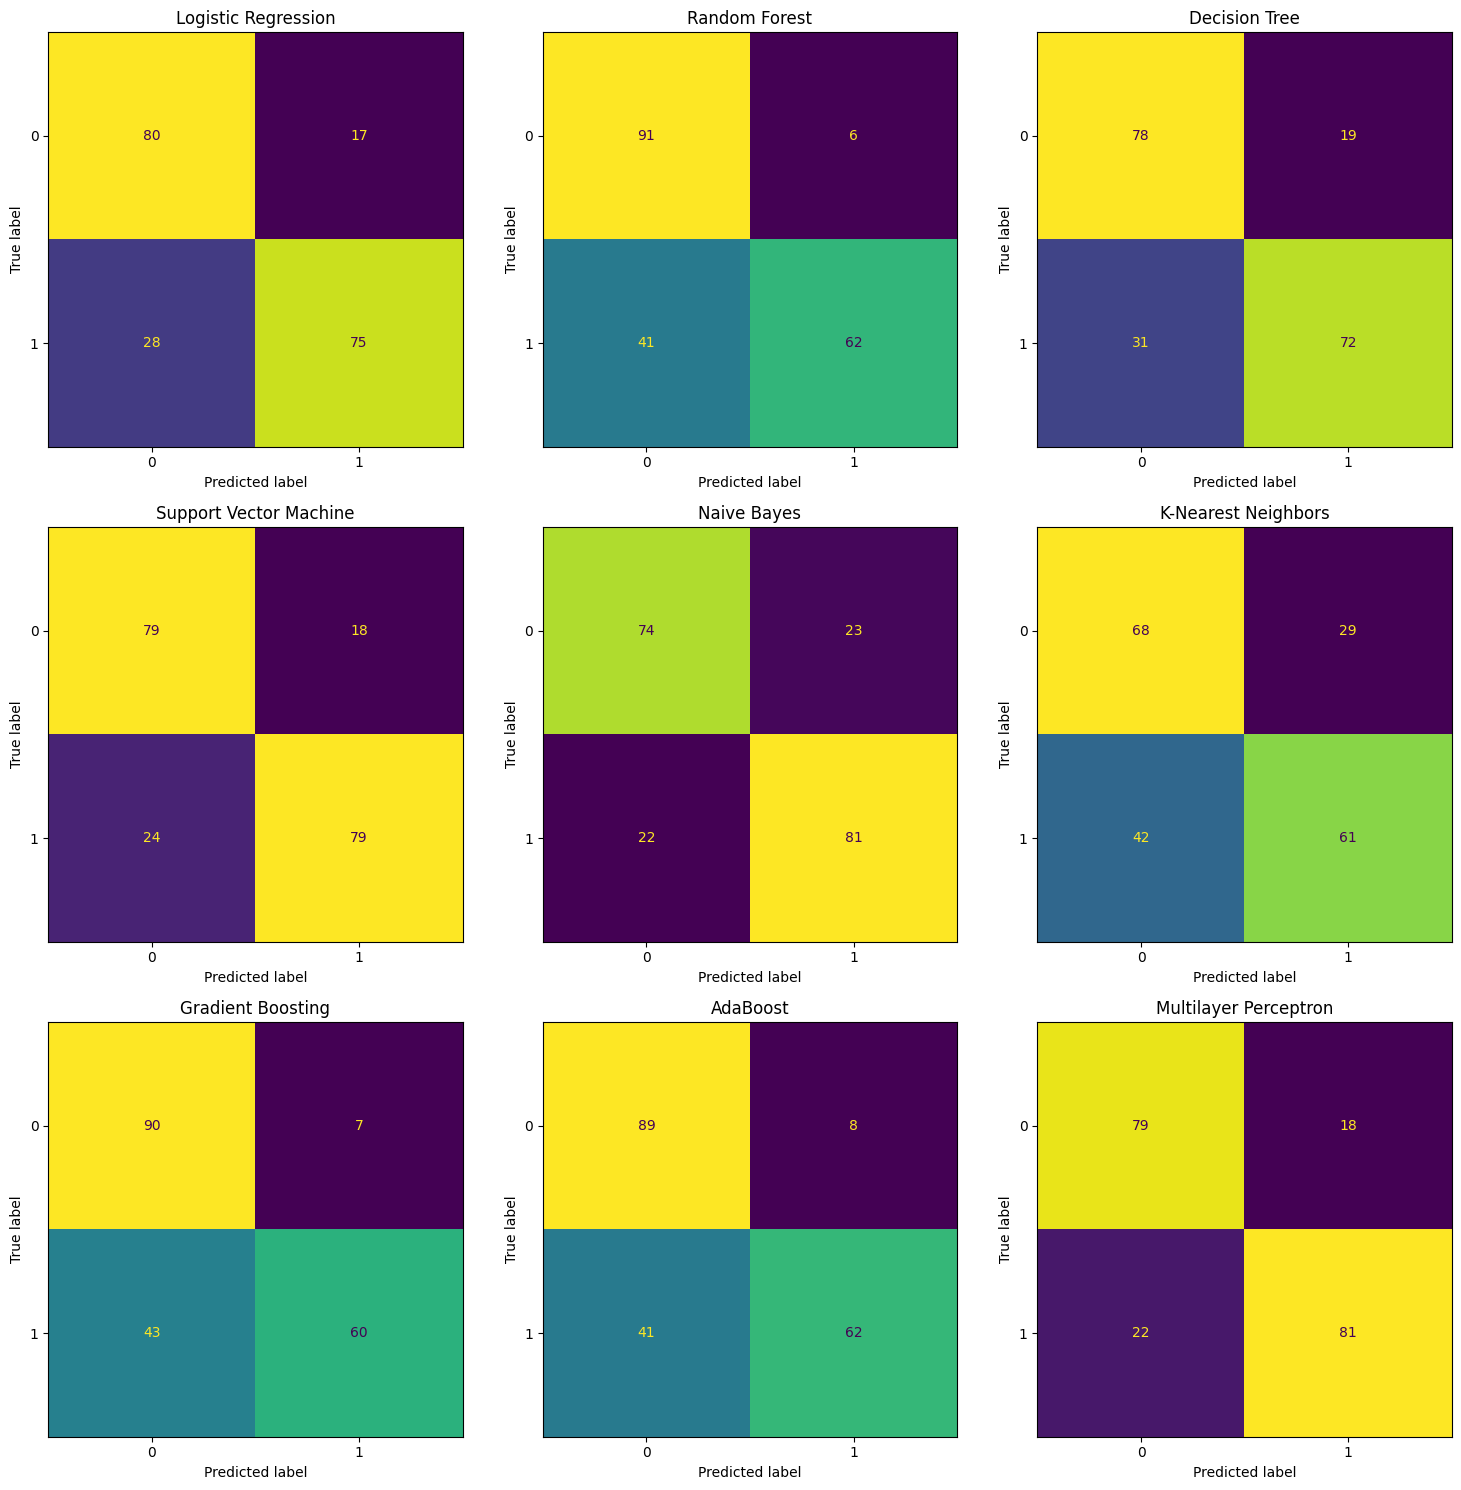

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression     0.775   0.815217  0.728155  0.769231
1           Random Forest     0.765   0.911765  0.601942  0.725146
2           Decision Tree     0.750   0.791209  0.699029  0.742268
3  Support Vector Machine     0.790   0.814433  0.766990  0.790000
4             Naive Bayes     0.775   0.778846  0.786408  0.782609
5     K-Nearest Neighbors     0.645   0.677778  0.592233  0.632124
6       Gradient Boosting     0.750   0.895522  0.582524  0.705882
7                AdaBoost     0.755   0.885714  0.601942  0.716763
8   Multilayer Perceptron     0.800   0.818182  0.786408  0.801980


In [12]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import os

# Models to be used
from sklearn.linear_model import LogisticRegression  # Logistic Regression (Maximum Entropy)
from sklearn.tree import DecisionTreeClassifier  # CART
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
from sklearn.neural_network import MLPClassifier  # Multilayer Perceptron
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost

# For evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Create outputs directory if it doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')

# Import dataset
dataset = pd.read_csv('raw_data/Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

# Text Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, len(dataset)):
    # Remove non-letter characters
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    # Convert to lowercase
    review = review.lower()
    # Split into words
    review = review.split()
    # Stem and remove stopwords
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')  # Keep 'not' in stopwords
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # Join back into a string
    review = ' '.join(review)
    # Append to corpus
    corpus.append(review)

# Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

# Splitting the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Define a function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{model_name} Model Performance:')
    print('Confusion Matrix:')
    print(cm)
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {prec:.4f}')
    print(f'Recall: {rec:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\n')
    return acc, prec, rec, f1, cm

# Initialize lists to store results and confusion matrices
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
confusion_matrices = []

# List of models to train
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('Support Vector Machine', SVC(kernel='linear', random_state=0)),
    ('Naive Bayes', MultinomialNB()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)),
    ('Multilayer Perceptron', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=1)),
]

# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc, prec, rec, f1, cm = evaluate_model(y_test, y_pred, model_name)
    model_names.append(model_name)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)
    confusion_matrices.append((model_name, cm))

# Plot individual confusion matrices and save them
for model_name, cm in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'outputs/confusion_matrix_{model_name.replace(" ", "_").lower()}.png')
    plt.close()

# Create a combined plot of confusion matrices
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.title.set_text(model_name)

plt.tight_layout()
plt.savefig('outputs/combined_confusion_matrices.png')
plt.show()

# Compile results into a DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Save results to CSV
results_df.to_csv('outputs/model_performance.csv', index=False)

# Display the results
print('Model Comparison:')
print(results_df)
